In [2]:
import drawSvg as draw
import math

G = 6.67384e-11 

AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE     # time between drawing each frame



In [3]:
# body class
class Body:
    def __init__(self, mass, x,y, vx,vy, pixel_radius, r,g,b):
                                                    #initializing Body parameters
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.pixel_radius = pixel_radius
        self.r = r
        self.g = g
        self.b = b

                                                     # Body color, for drawing purposes
        self.color = '#%02x%02x%02x' % (self.r,self.g,self.b)

    def update_position(self, timestep):             #function to update x and y coordinates
        self.x = self.x + timestep * self.vx
        self.y = self.y + timestep * self.vy

    def update_velocity(self, ax, ay, timestep):     #function to update velocity using acceleration
        self.vx = self.vx + timestep * ax
        self.vy = self.vy + timestep * ay

    def draw(self, pixels_per_meter):                #function to draw planets
        new_x  = self.x * pixels_per_meter           #converting from meters to pixels
        new_y  = self.y * pixels_per_meter
        D.append(draw.Circle(new_x, new_y, self.pixel_radius, fill=self.color))  
        


In [4]:

# system class
class System:
    def __init__(self, body_list):                  
        self.body_list = body_list                    #initializing System parameters

    def compute_acceleration(self, n):                #function to calculate acceleration
        ax = 0
        ay = 0
        for i in range(len(self.body_list)):
            if (i != n):                              #condition to exclude self
                dx = self.body_list[i].x - self.body_list[n].x
                dy = self.body_list[i].y - self.body_list[n].y
                r = math.sqrt(dx*dx + dy*dy)          #calculating distance between two bodies
                a = G * self.body_list[i].mass / (r*r)
                
                ax = ax + (a * dx / r)                #updating acceleration as combination of the effect of all bodies
                ay = ay + (a * dy / r)

        return ax, ay
    
    def update(self, timestep):
        
        for n in range (1, (len(self.body_list))):    #condition to exclude sun from updating position
            ax, ay = self.compute_acceleration(n)
            self.body_list[n].update_velocity(ax, ay, timestep)
            self.body_list[n].update_position(timestep)
            

    def draw(self, pixels_per_meter):                 #function to iteratively draw every body in the system
        for i in range (len(self.body_list)):
            self.body_list[i].draw(pixels_per_meter)
            


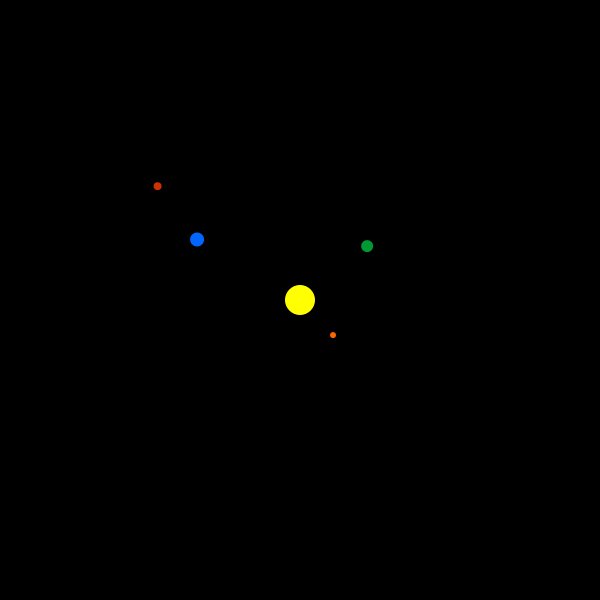

KeyboardInterrupt: 

In [5]:
# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)
    
solar_system = System([sun, mercury, venus, earth, mars])       #creating object system as a list of body objects

def draw_frame():                                               #function to draw and update bodies in system
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return( D )

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
   while( True ):
        D = draw.Drawing(600, 600, origin='center') # clear canvas
        D.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
        anim.draw_frame()